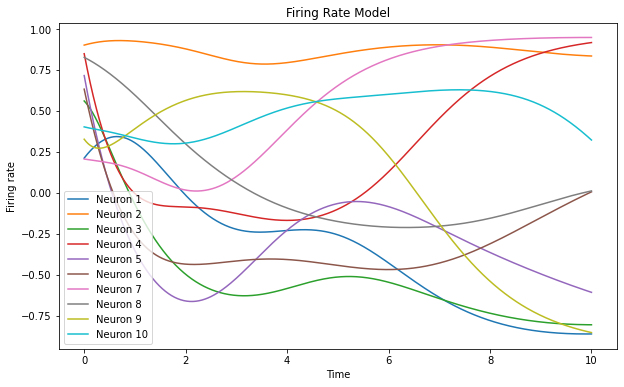

In [4]:
# my working solution

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of neurons
J = 1.0 / np.sqrt(N)  # Variance of synaptic couplings
g = 1.5  # Degree of nonlinearity
tau = 1.0  # Time constant

# Nonlinear gain function
def gain_function(h, g):
    return np.tanh(g * h)

# Dynamics of the network
def firing_rate_model(t, r, J, g, N):
    h = np.dot(J, r)  # Local field
    drdt = (-r + gain_function(h, g)) / tau
    return drdt

# Random asymmetric synaptic couplings
np.random.seed(42)
W = np.random.normal(0, J, (N, N))

# Initial conditions
r0 = np.random.rand(N)

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of differential equations
sol = solve_ivp(firing_rate_model, t_span, r0, args=(W, g, N), t_eval=t_eval, method='RK45')

# Plot the firing rate of the first 10 neurons
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(sol.t, sol.y[i], label=f'Neuron {i+1}')
plt.xlabel('Time')
plt.ylabel('Firing rate')
plt.legend()
plt.title('Firing Rate Model')
plt.show()


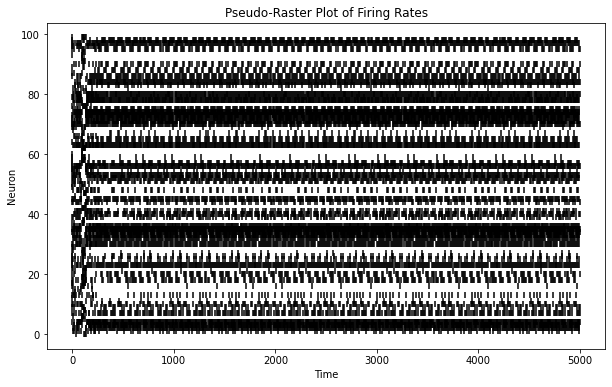

In [8]:
# Solution 2
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of neurons (reduced for better visualization)
J = 1.0 / np.sqrt(N)  # Variance of synaptic couplings
g = 1.5  # Degree of nonlinearity
tau = 1.0  # Time constant
threshold = 0.5  # Threshold for considering a neuron as active

# Nonlinear gain function
def gain_function(h, g):
    return np.tanh(g * h)

# Dynamics of the network
def firing_rate_model(t, r, J, g, N):
    h = np.dot(J, r)  # Local field
    drdt = (-r + gain_function(h, g)) / tau
    return drdt

# Random asymmetric synaptic couplings
np.random.seed(42)
W = np.random.normal(0, J, (N, N))

# Initial conditions
r0 = np.random.rand(N)

# Time span
t_span = (0, 5000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of differential equations
sol = solve_ivp(firing_rate_model, t_span, r0, args=(W, g, N), t_eval=t_eval, method='RK45')

# Create a pseudo-raster plot
plt.figure(figsize=(10, 6))
for i in range(N):
    spikes = sol.t[sol.y[i] > threshold]
    plt.scatter(spikes, [i] * len(spikes), marker='|', color='black')
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('Pseudo-Raster Plot of Firing Rates')
plt.show()


In [2]:
# Tim's solution
def initialize_network(N, g):

    # Initialize connection matrix with zeros
    J = np.random.normal(0, g/np.sqrt(N), (N,N))
    for i in range(N):
        J[i,i] = 0

    # Generate ODE
    def activation_ODE(t, x):
        dxdt = (-x + J @ np.tanh(x))
        return dxdt

    # Initialize active nodes randomly
    x_init = np.random.rand(N)

    return activation_ODE, J, x_init


def simulate_history(N, g, num_of_T, resolution):
    activation_ODE, J, x_init = initialize_network(N, g)
    t_sim = num_of_T
    t_eval = np.arange(0, t_sim, 1/resolution)
    sol = solve_ivp(activation_ODE, [0, t_sim], x_init, t_eval=t_eval)
    activation_history = sol.y

    return J, activation_history

# Parameters
N = 1000                 # Number of nodes
#C = 20                  # Number of connections per node
#tau = 1                 # time constant
num_of_T = 1000           # number of simulated time constants
resolution = 10         # resolution of each time constant

#mu = 0                  # connectivity mean
g = 1.1                 # measure of connectivity variance
#nonlin = 1              # nonlinearity parameter
J, activation_history = simulate_history(N, g, num_of_T, resolution)